#Skin Cancer Detection (CNN) Using VGG-16 (Transfer Learning)

###Importing Dependencies

In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

###Preparing the model

In [2]:
vgg = VGG16(input_shape=[224,224] + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 3s 0us/step


In [3]:
for layers in vgg.layers:
  layers.trainable = False

In [4]:
x = Flatten()(vgg.output)
prediction = Dense(2, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [5]:
from tensorflow import keras
model.compile(optimizer=keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])


###Data Augmentation

In [6]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [7]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [8]:
train_set = train_datagen.flow_from_directory("/content/drive/MyDrive/Colab Notebooks/datasets/data/train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


test_set = test_datagen.flow_from_directory("/content/drive/MyDrive/Colab Notebooks/datasets/data/test",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2647 images belonging to 2 classes.
Found 666 images belonging to 2 classes.


So above, train_set and test_set are "generators" which will perform data augmentation on the "flow", while fitting the model. train/test_datagen are generator objects that defines the factors of augmentation.

In [9]:
model_history=model.fit_generator(
  train_set,
  validation_data=test_set,
  steps_per_epoch=20,
  epochs=10,
  validation_steps=32,
  verbose=1)

<ipython-input-9-9847a2a95826>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history=model.fit_generator(


Epoch 1/10
20/20 [==============================] - ETA: 0s - loss: 2.1314 - accuracy: 0.7609 

20/20 [==============================] - 683s 35s/step - loss: 2.1314 - accuracy: 0.7609 - val_loss: 2.1536 - val_accuracy: 0.8063
Epoch 2/10
20/20 [==============================] - 163s 8s/step - loss: 1.6647 - accuracy: 0.8234
Epoch 3/10
20/20 [==============================] - 122s 6s/step - loss: 1.4417 - accuracy: 0.8067
Epoch 4/10
20/20 [==============================] - 87s 4s/step - loss: 1.5330 - accuracy: 0.8172
Epoch 5/10
20/20 [==============================] - 74s 4s/step - loss: 1.8802 - accuracy: 0.8082
Epoch 6/10
20/20 [==============================] - 47s 2s/step - loss: 1.7995 - accuracy: 0.8098
Epoch 7/10
20/20 [==============================] - 44s 2s/step - loss: 1.3619 - accuracy: 0.8463
Epoch 8/10
20/20 [==============================] - 41s 2s/step - loss: 1.4771 - accuracy: 0.8273
Epoch 9/10
20/20 [==============================] - 21s 1s/step - loss: 1.7531 - accuracy: 0.8219
Epoch 10/10
20/20 [==============================] - 23s 1s/step - loss: 1.4446 - a

###Plotting the Accuracy Curve

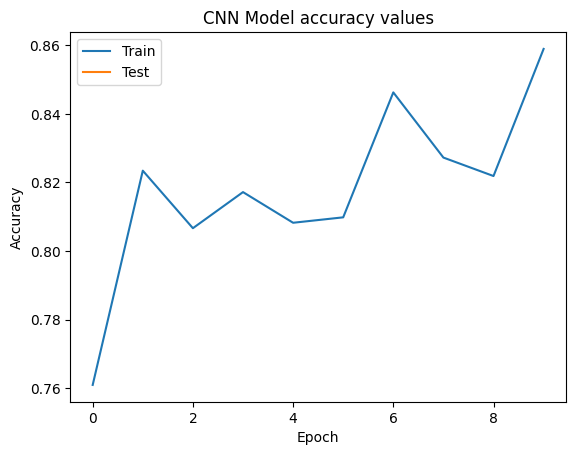

In [10]:
_# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Based on the number of images, we are able to achieve good accuracy! All thanks to VGG-16!